In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from numpy import nan

In [128]:
arquivo = 'd:\diabetes.csv'
diabetes = pd.read_csv(arquivo)

#Para exibir as 5 primeiras linhas
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5,1,'Distribuição da variável target (Outcome 0 e 1)')

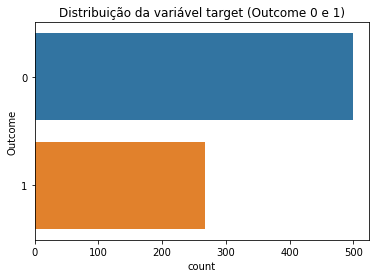

In [65]:
sns.countplot(y=diabetes['Outcome']).set_title('Distribuição da variável target (Outcome 0 e 1)')


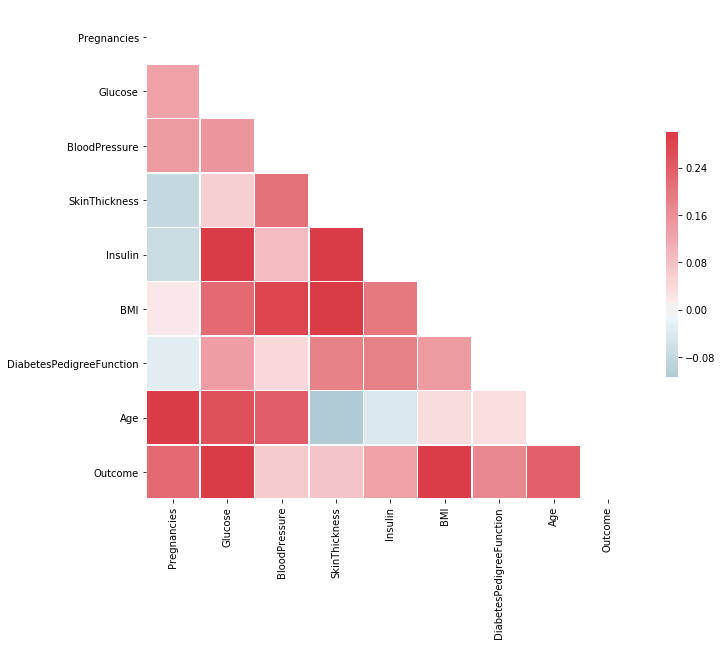

In [129]:
corr = diabetes.corr()

# Fonte: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

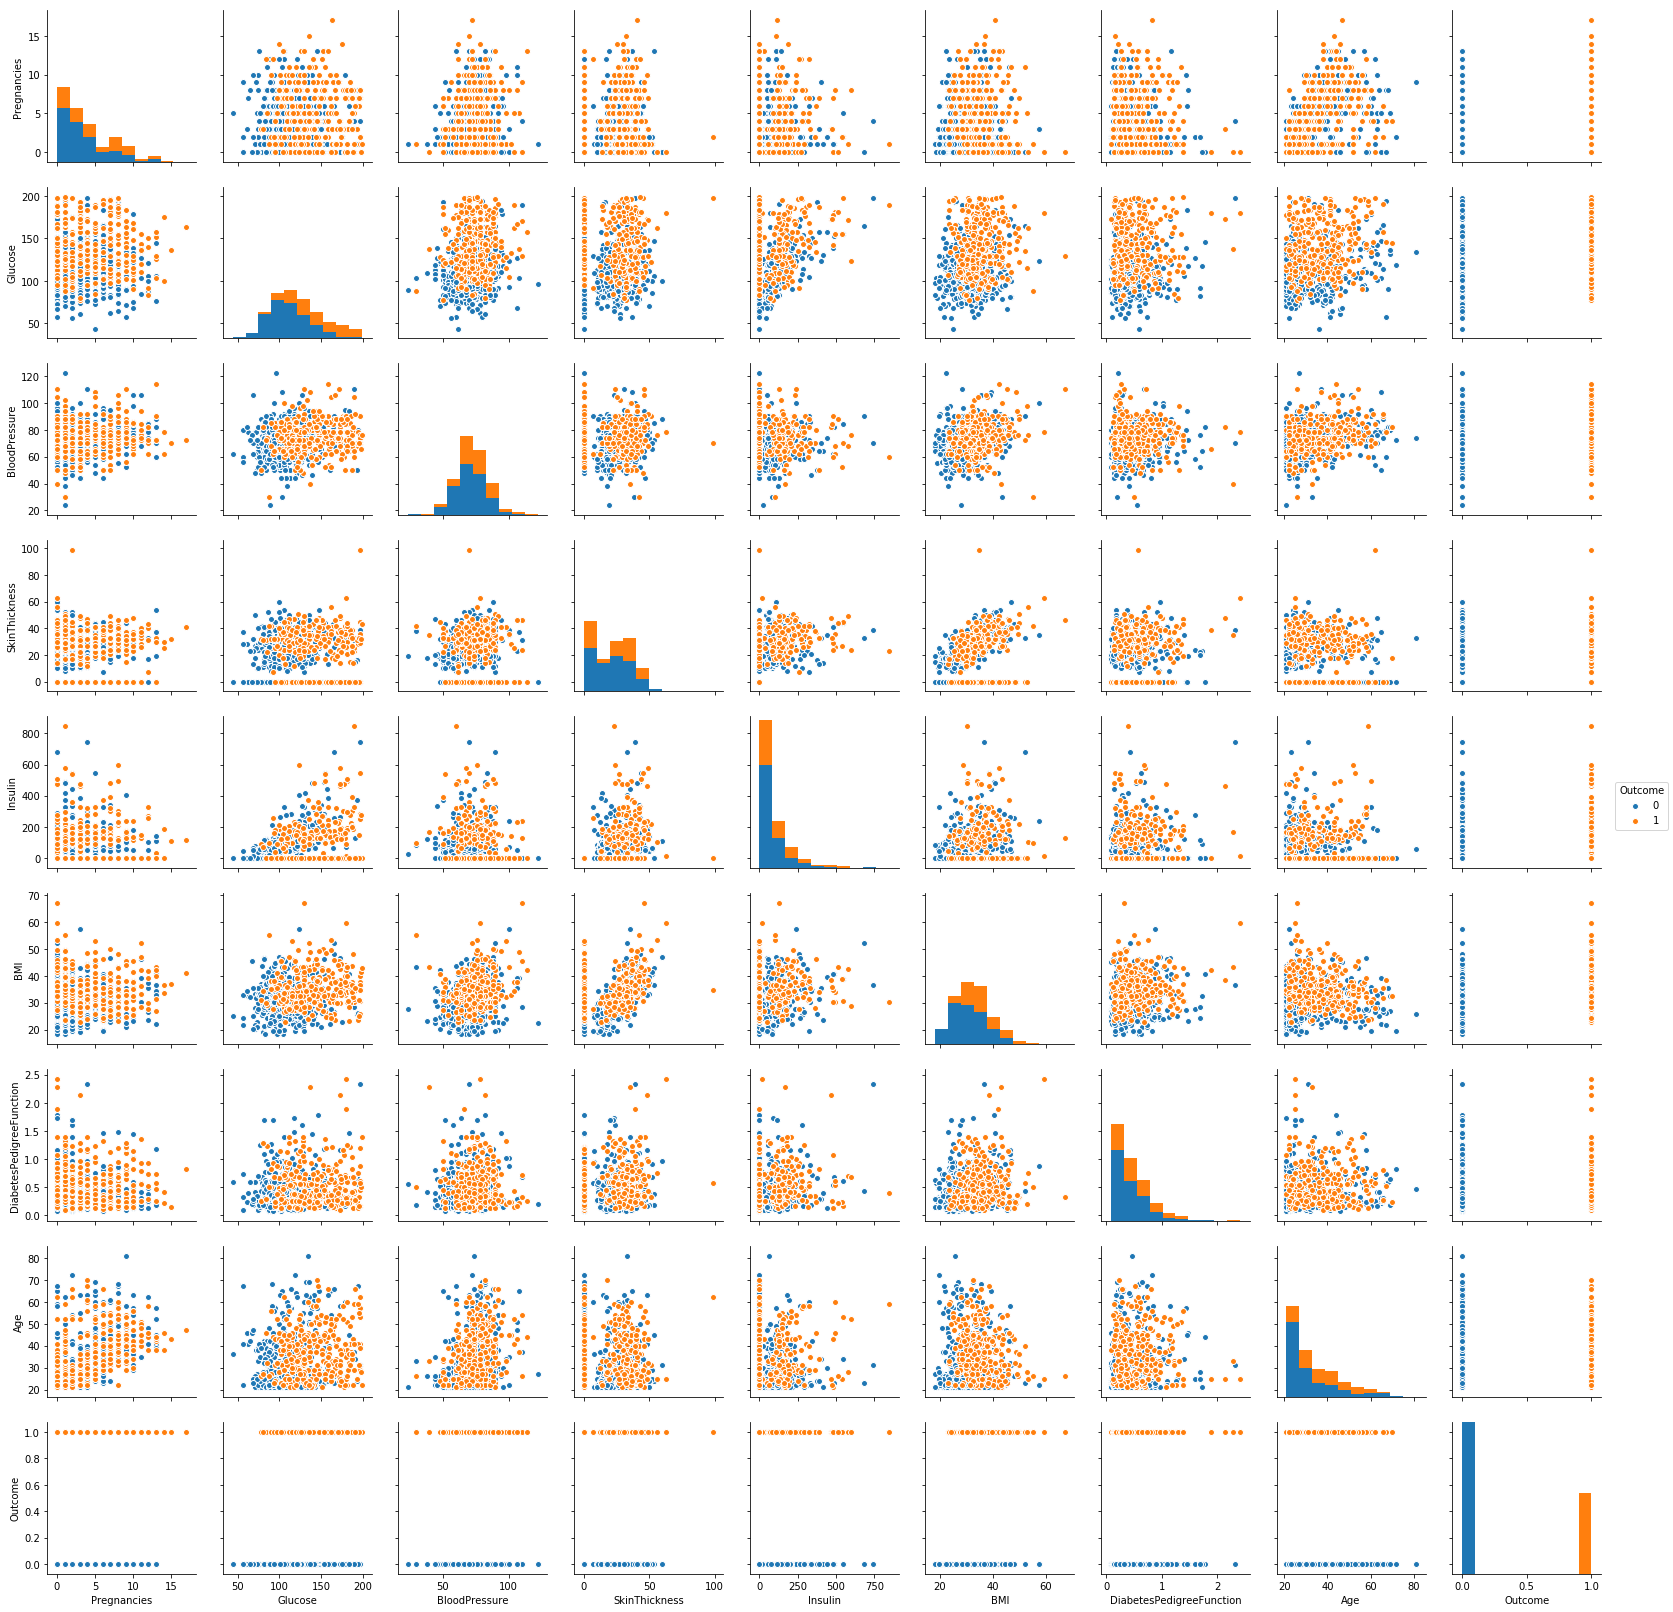

In [15]:
sns.pairplot(diabetes, hue="Outcome")

In [130]:
diabetes[['Glucose','BloodPressure','BMI']] = diabetes[['Glucose','BloodPressure','BMI']].replace(0, nan)
diabetes.fillna(diabetes.mean(), inplace=True)

In [145]:
cols=list(diabetes.columns)
target=['Outcome']
cols=list(set(cols)-set(target))
#cols=['Pregnancies','Glucose','BloodPressure']
X=diabetes[cols]
y=diabetes[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [149]:
model = sm.Logit(y_train, X_train)
result = model.fit(method='newton')
y_pred = (result.predict(X_test) >= 0.50).astype(int)

print(result.summary())
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.576126
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 Oct 2020   Pseudo R-squ.:                  0.1075
Time:                        00:19:34   Log-Likelihood:                -353.74
converged:                       True   LL-Null:                       -396.34
                                        LLR p-value:                 1.191e-15
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0028      0.010     -0.290      0.772      -0.022